In [3]:
import json

In [4]:
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_true"
lens = 'raw_data_lens.json'
likelihoods = 'likelihood_threshold_results.json'
#likelihoods = 'perturbation_5_d_results.json'

In [5]:
f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)

In [6]:
sample_no = 0


In [7]:
print(lens_list[sample_no])
print(lls_dict.keys())
print(len(lls_dict['raw_results']))
print(len(lls_dict['predictions']['samples']))

86
dict_keys(['name', 'predictions', 'info', 'raw_results', 'metrics', 'pr_metrics', 'loss'])
10100
10100


In [8]:
print(len(lls_dict['raw_results'][sample_no]))
print((lls_dict['raw_results'][sample_no]))

4
{'original': 'Salviae', 'original_crit': -4.255489349365234, 'sampled': 'Salviae', 'sampled_crit': -4.255489349365234}


In [9]:
ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]
ex_1 = lls_dict['raw_results'][lens_list[sample_no]:lens_list[sample_no]+lens_list[sample_no+1]]
ex_2 = lls_dict['raw_results'][lens_list[sample_no]+lens_list[sample_no+1]:lens_list[sample_no]+lens_list[sample_no+1]+lens_list[sample_no+2]]
ex_3 = lls_dict['raw_results'][lens_list[sample_no]+lens_list[sample_no+1]+lens_list[sample_no+2]:lens_list[sample_no]+lens_list[sample_no+1]+lens_list[sample_no+2]+lens_list[sample_no+3]]
ex_4 = lls_dict['raw_results'][lens_list[sample_no]+lens_list[sample_no+1]+lens_list[sample_no+2]+lens_list[sample_no+3]:lens_list[sample_no]+lens_list[sample_no+1]+lens_list[sample_no+2]+lens_list[sample_no+3]+lens_list[sample_no+4]]

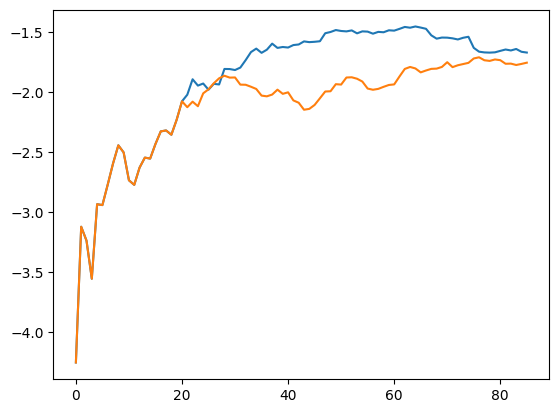

0.5468446114306204
0.4413548058156496


In [10]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([item['original_crit'] for item in ex_0])
y2 = np.array([item['sampled_crit'] for item in ex_0])

plt.plot(y1)
plt.plot(y2)

plt.show()
print(np.std(y1))
print(np.std(y2))

0.9238163194614203
1.1961881735643483


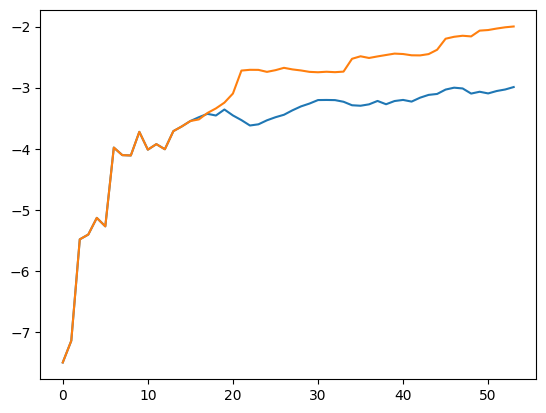

In [11]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([item['original_crit'] for item in ex_1])
y2 = np.array([item['sampled_crit'] for item in ex_1])

plt.plot(y1)
plt.plot(y2)
print(np.std(y1))
print(np.std(y2))
plt.show()

0.7267454864270628
0.7003168991390998


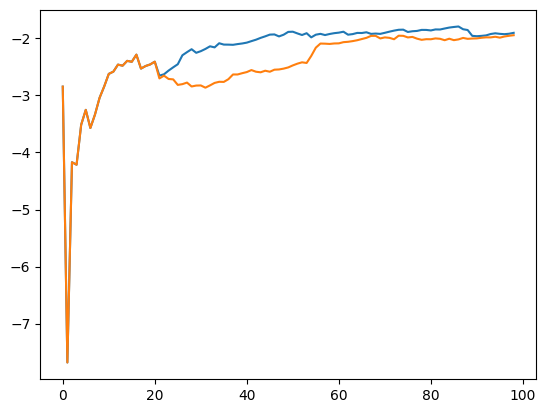

In [12]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([item['original_crit'] for item in ex_2])
y2 = np.array([item['sampled_crit'] for item in ex_2])

plt.plot(y1)
plt.plot(y2)

print(np.std(y1))
print(np.std(y2))

plt.show()

1.1548236554727855
1.1378279230390684


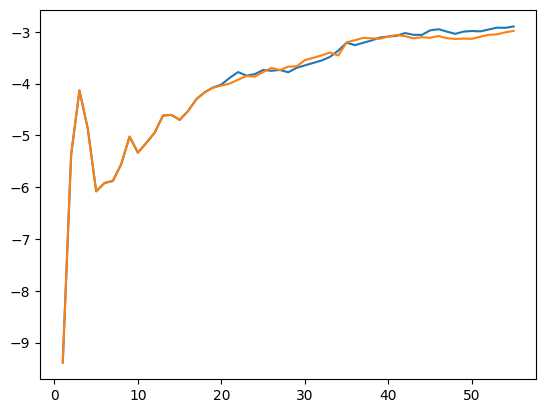

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([item['original_crit'] for item in ex_3])
y2 = np.array([item['sampled_crit'] for item in ex_3])

plt.plot(y1)
plt.plot(y2)

print(np.nanstd(y1))
print(np.nanstd(y2))

plt.show()

[        nan -5.90736866 -2.68772507 -3.49909639 -3.66018867 -3.64742064
 -3.7984395  -3.51516414 -3.39698267 -3.13166881 -3.25215816 -3.42629123
 -3.68604207 -3.62855744 -3.63846374 -3.51259398 -3.48138213 -3.65685964
 -3.83734083 -3.48173261 -3.63541627 -3.56961703 -3.44600248 -3.38372254
 -3.27020073 -3.21754241 -3.11685395 -3.01768637 -2.78744125 -2.79024649
 -2.7322917  -2.68428111 -2.63519311 -2.57351732 -2.55968976 -2.5242219
 -2.47393417 -2.41832876 -2.37335539 -2.32680106 -2.4109869  -2.37896395
 -2.31094265 -2.30556798 -2.27073479 -2.25225592 -2.15119123 -2.25438094
 -2.29852343 -2.27938461 -2.27962852 -2.25251269 -2.19992304 -2.19603562
 -2.17158961 -2.14309764 -2.21009612 -2.2958684  -2.30092907 -2.28798413
 -2.25114083 -2.20117378 -2.09643626 -2.12009692 -2.1095717  -2.16927767
 -2.19745445 -2.14495277 -2.10709167 -2.11099553 -2.14344668 -2.13618016
 -2.07913899 -2.07239485 -2.07297015 -2.05633283 -2.03940129 -2.03320813
 -2.07370639 -2.06538415 -2.05572295 -2.04991388 -2.

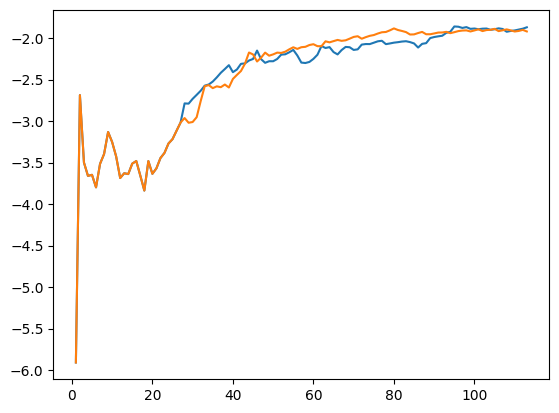

In [14]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([item['original_crit'] for item in ex_4])
y2 = np.array([item['sampled_crit'] for item in ex_4])
print(y1)
print(np.nanstd(y1))
print(np.nanstd(y2))
plt.plot(y1)
plt.plot(y2)



plt.show()

In [15]:
### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    ex = lls_dict['raw_results'][acc:acc + len_s]
    y1 = np.array([item['original_crit'] for item in ex])
    y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanmean(y2))
    org_stds.append(np.nanmean(y1))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))

100
100


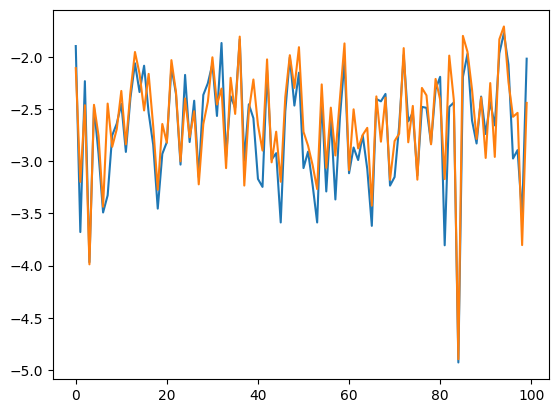

In [16]:

plt.plot(org_stds)
plt.plot(samples_stds)



plt.show()

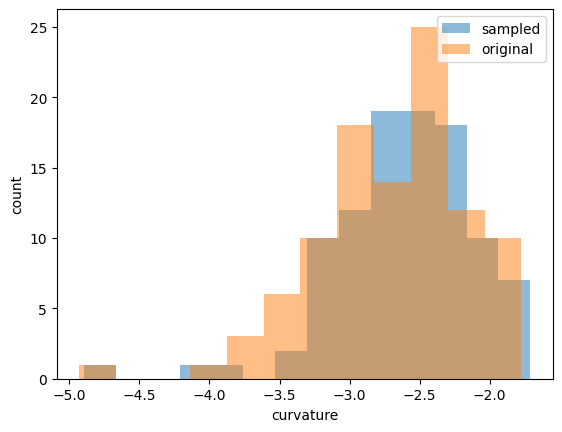

0.5377950731220201
0.5007784351571976


In [17]:
import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

# Likelihoods

100
100


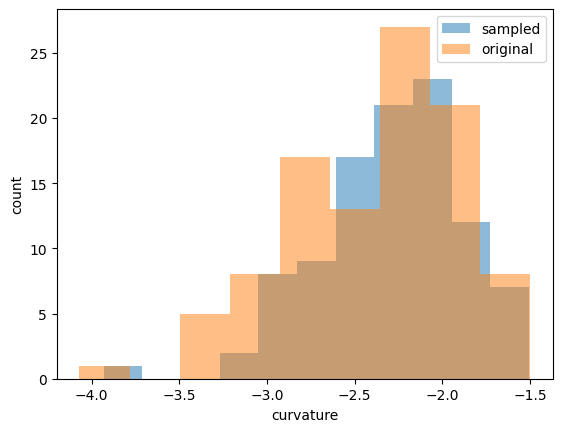

0.47744757773406427
0.4051306824828342


In [1]:
import json
import numpy as np 

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_true"

lens = 'raw_data_lens.json'
likelihoods = 'likelihood_threshold_results.json'
#likelihoods = 'perturbation_5_d_results.json'
f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)
### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0
samples_last_ll = []
org_last_ll = []

all_samples = []
all_org = []

for i, len_s in enumerate(lens_list):
    ex = lls_dict['raw_results'][acc:acc + len_s]
    y1 = np.array([item['original_crit'] for item in ex])
    y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanmean(y2[25:]))
    org_stds.append(np.nanmean(y1[25:]))
    all_samples.extend(y2[25:])
    all_org.extend(y1[25:])
    org_last_ll.append(y1[-1])
    samples_last_ll.append(y2[-1])
    acc += len_s

print(len(samples_stds))
print(len(org_stds))
import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

y1_ll = y1
y2_ll = y2

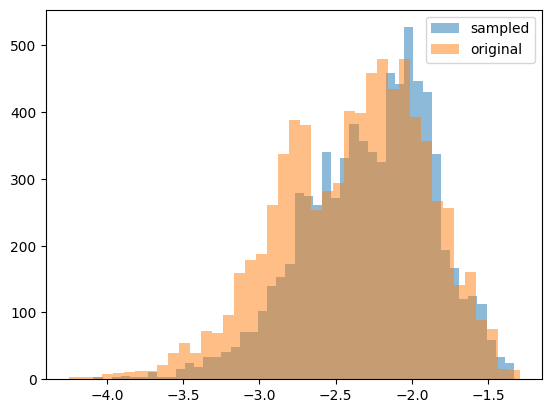

In [4]:
plt.hist(all_samples, alpha=0.5, bins='auto', label='sampled')
plt.hist(all_org, alpha=0.5, bins='auto', label='original')
plt.legend()

# Curvature

100
100


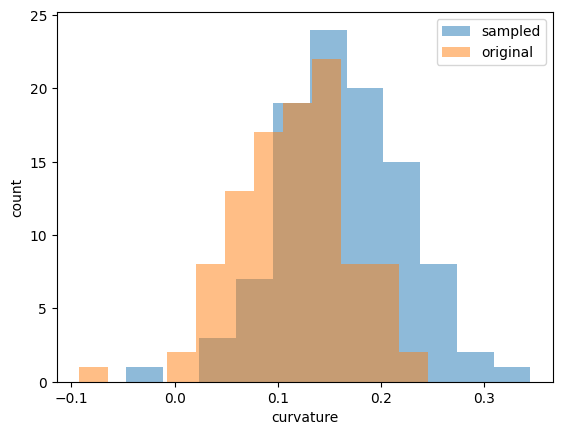

0.054144186120148985
0.06110727817884632


In [17]:
import json
import numpy as np

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_true"
lens = 'raw_data_lens.json'
#likelihoods = 'likelihood_threshold_results.json'
likelihoods = 'perturbation_5_d_results.json'

f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)


### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    y1 = lls_dict['predictions']['real'][acc:acc + len_s]
    y2 = lls_dict['predictions']['samples'][acc:acc + len_s]
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanmean(y2[25::]))
    org_stds.append(np.nanmean(y1[25::]))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))

import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

y1_tr = y1
y2_tr = y2

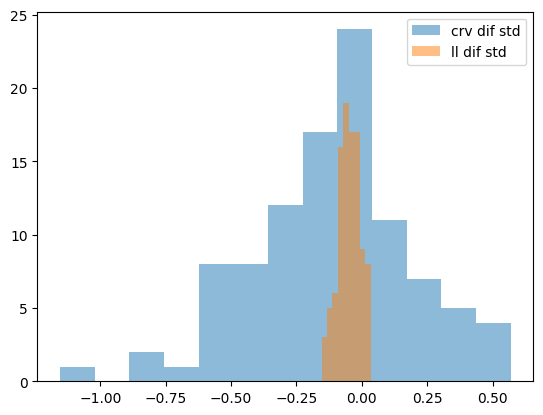

In [22]:
# diffs
# y1_norm_ll = y1_ll/ np.linalg.norm(y1_ll)
# y2_norm_ll = y2_ll/ np.linalg.norm(y2_ll)


y1_mix = np.array(y1_tr)-np.array(y2_tr)
y2_mix = np.array(y1_ll)-np.array(y2_ll)
last_ll_diff = np.array(org_last_ll) - np.array(samples_last_ll)


plt.hist(y2_mix, alpha=0.5, bins='auto', label='crv dif std')
plt.hist(y1_mix, alpha=0.5, bins='auto', label='ll dif std')


plt.legend(loc='upper right')


In [23]:
print(len(y2_mix))
print(sum((y2_mix<0)+(y1_mix<0)))
print(sum(y1_mix<0))
print(sum(y2_mix<0))
print(sum(last_ll_diff<0))

100
99
85
69
74


# SQUAD

# 

# Likelihoods

100
100


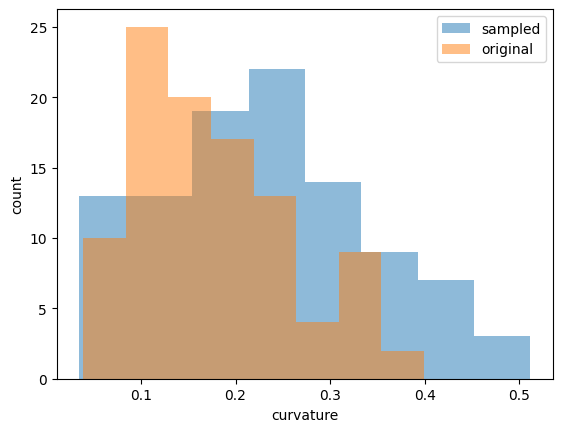

0.08254556923932593
0.1116645396341918


In [3]:
import json
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-squad-100--m150--tok_true"

lens = 'raw_data_lens.json'
likelihoods = 'likelihood_threshold_results.json'
#likelihoods = 'perturbation_5_d_results.json'
f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)
### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    ex = lls_dict['raw_results'][acc:acc + len_s]
    y1 = np.array([item['original_crit'] for item in ex])
    y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanstd(y2[25:]))
    org_stds.append(np.nanstd(y1[25:]))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))
import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

y1_ll_sq = y1
y2_ll_sq = y2

100
100


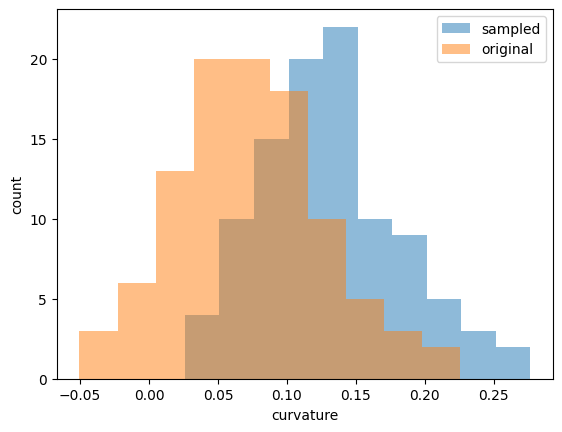

0.05336839293449126
0.050495698582029555


In [22]:
import json
import numpy as np

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-squad-100--m150--tok_true"
lens = 'raw_data_lens.json'
#likelihoods = 'likelihood_threshold_results.json'
likelihoods = 'perturbation_5_d_results.json'

f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)


### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    y1 = lls_dict['predictions']['real'][acc:acc + len_s]
    y2 = lls_dict['predictions']['samples'][acc:acc + len_s]
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanmean(y2[25::]))
    org_stds.append(np.nanmean(y1[25::]))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))

import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

y1_sq = y1
y2_sq = y2

# Mix

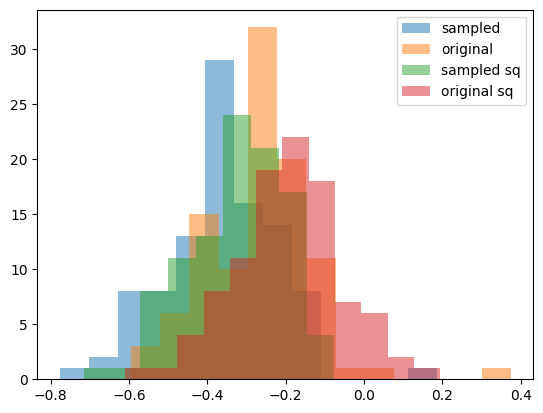

In [8]:
y1_norm_ll = y1_ll/ np.linalg.norm(y1_ll)
y2_norm_ll = y2_ll/ np.linalg.norm(y2_ll)


y1_norm_ll_sq = y1_ll_sq/ np.linalg.norm(y1_ll_sq)
y2_norm_ll_sq = y2_ll_sq/ np.linalg.norm(y2_ll_sq)


y1_mix = np.array(y1_tr)*np.array(y1_ll)
y2_mix = np.array(y2_tr)*np.array(y2_ll)

y1_mix_sq = np.array(y1_sq)*np.array(y1_ll_sq)
y2_mix_sq = np.array(y2_sq)*np.array(y2_ll_sq)


plt.hist(y2_mix, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1_mix, alpha=0.5, bins='auto', label='original')

plt.hist(y2_mix_sq, alpha=0.5, bins='auto', label='sampled sq')
plt.hist(y1_mix_sq, alpha=0.5, bins='auto', label='original sq')

plt.legend(loc='upper right')


In [18]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import math

real_preds =  [element for element in y1_mix if not math.isnan(element)]
sample_preds = [element for element in y2_mix if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_accurate = '/home/niloofar/projects/detect-gpt-copying/results/mistral/EleutherAI_pythia-2.8b-main-t5-3b-temp/fp32-0.3-1-the_pile-312/perturbation_25_d_results.json'
roc_file = open(roc_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

roc_less_accurate = '/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_false/perturbation_5_d_results.json'
roc_file = open(roc_less_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

0.4193055555555556
0.8039055555555557
0.6752


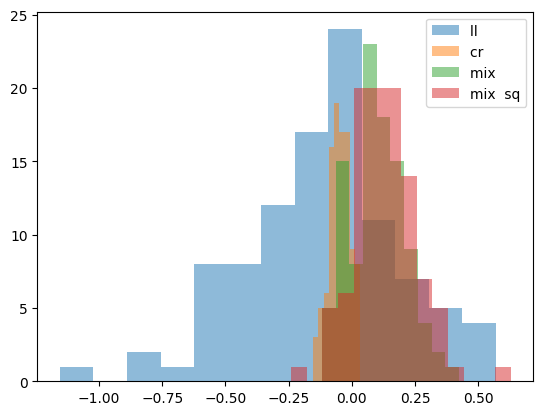

In [9]:
y1_norm_ll = y1_ll/ np.linalg.norm(y1_ll)
y2_norm_ll = y2_ll/ np.linalg.norm(y2_ll)


y1_norm_ll_sq = y1_ll_sq/ np.linalg.norm(y1_ll_sq)
y2_norm_ll_sq = y2_ll_sq/ np.linalg.norm(y2_ll_sq)


y1_mix = np.array(y1_tr)*np.array(y1_ll)
y2_mix = np.array(y2_tr)*np.array(y2_ll)

y1_mix_sq = np.array(y1_sq)*np.array(y1_ll_sq)
y2_mix_sq = np.array(y2_sq)*np.array(y2_ll_sq)


#plt.hist(y2_mix, alpha=0.5, bins='auto', label='sampled')
plt.hist(np.array(y1_ll) - np.array(y2_ll), alpha=0.5, bins='auto', label='ll ')

#plt.hist(y2_mix_sq, alpha=0.5, bins='auto', label='sampled sq')
plt.hist(np.array(y1_tr) - np.array(y2_tr), alpha=0.5, bins='auto', label='cr ')


plt.hist(np.array(y1_mix) - np.array(y2_mix), alpha=0.5, bins='auto', label='mix ')


plt.hist(np.array(y1_mix_sq) - np.array(y2_mix_sq), alpha=0.5, bins='auto', label='mix  sq')

plt.legend(loc='upper right')


In [136]:
print(y2_ll)

[-2.0737117926279702, nan, -2.646339178085327, nan, -2.869206517934799, -2.800542116165161, -3.185852789878845, -2.3098337650299072, -2.9838822285334268, nan, nan, -3.1436493396759033, -2.2734002802107067, -2.146602511405945, -2.421866946750217, -2.7902223269144693, -2.3785510063171387, -2.577326941490173, -2.8312689304351806, nan, -3.0424309571584067, -2.0068329572677612, -2.2627918503501196, -3.4187400341033936, -2.6659971475601196, -2.941199016571045, -2.724096655845642, -3.2358057839529857, -2.955971121788025, -2.285674571990967, -2.3704099655151367, -2.6582770943641663, -2.365516424179077, -2.8347845673561096, nan, -2.5117580890655518, nan, -3.5329131285349527, -2.906482378641764, nan, -2.8381427526474, -3.326310396194458, -2.116946744918823, -3.407067656517029, -3.014009654521942, -3.521838569641113, nan, nan, -2.3860414028167725, nan, -3.0633559226989746, -2.9051424775804793, -3.4069824616114297, -3.4262490034103394, -2.6483075618743896, -3.1363326140812466, nan, -3.189458343717

In [34]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import math

real_preds =  [element for element in y2_mix if not math.isnan(element)]
sample_preds = [element for element in y1_mix if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)


real_preds =  [element for element in y1 if not math.isnan(element)]
sample_preds = [element for element in y2 if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)


real_preds =  [element for element in y1_ll if not math.isnan(element)]
sample_preds = [element for element in y2_ll if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

print("*****")
roc_accurate = '/home/niloofar/projects/detect-gpt-copying/results/mistral/EleutherAI_pythia-2.8b-main-t5-3b-temp/fp32-0.3-1-the_pile-312/perturbation_25_d_results.json'
roc_file = open(roc_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

roc_less_accurate = '/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_false/perturbation_5_d_results.json'
roc_file = open(roc_less_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

0.7363000000000001
0.7250000000000001
0.5612
*****
0.8039055555555557
0.6752


# 1 by 1 mix

In [14]:
import json
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_true"

lens = 'raw_data_lens.json'
likelihoods = 'likelihood_threshold_results.json'
#likelihoods = 'perturbation_5_d_results.json'
f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)
### get stds


import json
import numpy as np

#likelihoods = 'likelihood_threshold_results.json'
curvatures = 'perturbation_5_d_results.json'


f_cr = open(f'{directory}/{curvatures}')
cr_dict = json.load(f_cr)

samples_lls = []
samples_cr = []
org_lls = []
org_cr = []

samples_mix = []
org_mix = []
offset = 25

diffs_lls = []
diffs_cr = []
diffs_mix = []

acc = 0
print((lls_dict['raw_results'][:2]))
print((cr_dict['raw_results'][:2]))

for i, len_s in enumerate(lens_list):
    ex = lls_dict['raw_results'][acc:acc + len_s]

    y1_lls = np.array([item['original_crit'] for item in ex])
    y2_lls = np.array([item['sampled_crit'] for item in ex])

    samples_lls.append(np.nanmean(y2_lls[offset:]))
    org_lls.append(np.nanmean(y1_lls[offset:]))
    diffs_lls.append(np.mean(np.array(y1_lls[offset::])- np.array(y2_lls[offset::])))


    y1_cr = cr_dict['predictions']['real'][acc:acc + len_s]
    y2_cr = cr_dict['predictions']['samples'][acc:acc + len_s]
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])

    samples_cr.append(np.nanmean(y2_cr[offset::]))
    org_cr.append(np.nanmean(y1_cr[offset::]))
    diffs_cr.append(np.mean(np.array(y1_cr[offset::])- np.array(y2_cr[offset::])))
    if len(y1_lls) != len(y1_cr):
        break
    #print(len(y1_lls),len(y1_cr), len(samples_mix))

    y1_mix = np.array(y1_lls)*np.array(y1_cr)
    y2_mix = np.array(y2_lls)*np.array(y2_cr)
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])
    samples_mix.append(np.mean(y2_mix[offset::]))
    org_mix.append(np.mean(y1_mix[offset::]))
    diffs_mix.append(np.mean(np.array(y1_mix[offset::])- np.array(y2_mix[offset::])))

    acc += len_s

[{'original': 'Salviae', 'original_crit': -4.255489349365234, 'sampled': 'Salviae', 'sampled_crit': -4.255489349365234}, {'original': 'Salviae radix', 'original_crit': -3.1247074604034424, 'sampled': 'Salviae radix', 'sampled_crit': -3.1247074604034424}]
[{'original': 'Salviae', 'sampled': 'Salviae', 'perturbed_sampled': ['Salviae', 'Salviae', 'Salviae', 'Salviae', 'Salviae'], 'perturbed_original': ['Salviae', 'Salviae', 'Salviae', 'Salviae', 'Salviae'], 'original_ll': -4.255489349365234, 'sampled_ll': -4.255489349365234, 'all_perturbed_sampled_ll': [-4.255489349365234, -4.255489349365234, -4.255489349365234, -4.255489349365234, -4.255489349365234], 'all_perturbed_original_ll': [-4.255489349365234, -4.255489349365234, -4.255489349365234, -4.255489349365234, -4.255489349365234], 'perturbed_sampled_ll': -4.255489349365234, 'perturbed_original_ll': -4.255489349365234, 'perturbed_sampled_ll_std': 0.0, 'perturbed_original_ll_std': 0.0}, {'original': 'Salviae radix', 'sampled': 'Salviae radi

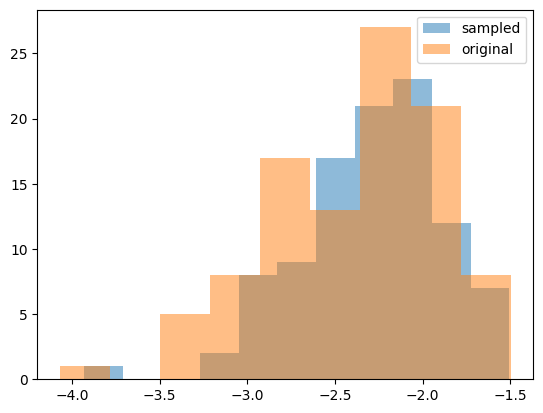

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(samples_lls, alpha=0.5, bins='auto', label='sampled')
plt.hist(org_lls, alpha=0.5, bins='auto', label='original')

plt.legend(loc='upper right')

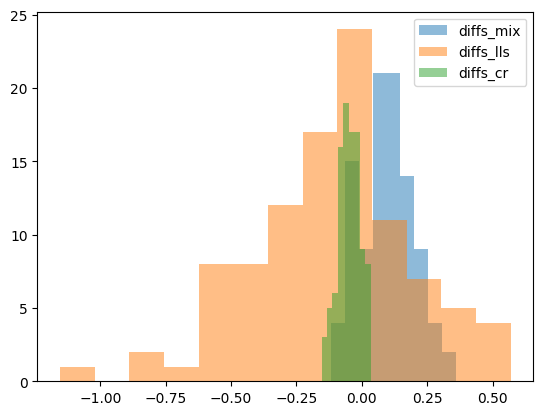

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(diffs_mix, alpha=0.5, bins='auto', label='diffs_mix')
plt.hist(diffs_lls, alpha=0.5, bins='auto', label='diffs_lls')

plt.hist(diffs_cr, alpha=0.5, bins='auto', label='diffs_cr')

plt.legend(loc='upper right')

In [12]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import math

real_preds =  [element for element in samples_mix if not math.isnan(element)]
sample_preds = [element for element in org_mix if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)


real_preds =  [element for element in org_lls if not math.isnan(element)]
sample_preds = [element for element in samples_lls if not math.isnan(element)]

fpr_ll, tpr_ll, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr_ll, tpr_ll)
print(roc_auc)


real_preds =  [element for element in org_cr if not math.isnan(element)]
sample_preds = [element for element in samples_cr if not math.isnan(element)]

fpr_cr, tpr_cr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr_cr, tpr_cr)
print(roc_auc)

print("*****")
roc_accurate = '/home/niloofar/projects/detect-gpt-copying/results/mistral/EleutherAI_pythia-2.8b-main-t5-3b-temp/fp32-0.3-1-the_pile-312/perturbation_25_d_results.json'
roc_file = open(roc_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

roc_less_accurate = '/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_false/perturbation_5_d_results.json'
roc_file = open(roc_less_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

0.628645110097203
0.5612
0.7250000000000001
*****
0.8039055555555557
0.6752


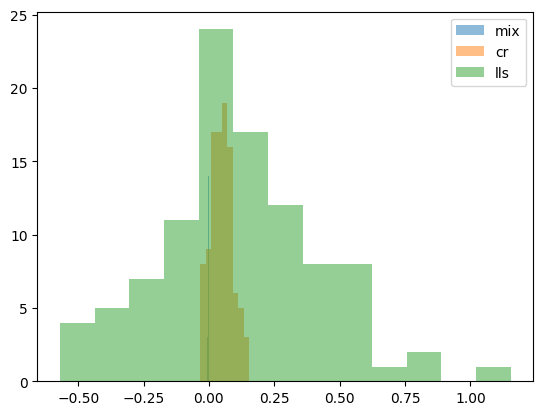

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(np.array(samples_mix)-np.array(org_mix), alpha=0.5, bins='auto', label='mix')
plt.hist(np.array(samples_cr)-np.array(org_cr), alpha=0.5, bins='auto', label='cr')
plt.hist(np.array(samples_lls)-np.array(org_lls), alpha=0.5, bins='auto', label='lls')


plt.legend(loc='upper right')

# ROC

In [19]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import math

real_preds =  [element for element in org_stds if not math.isnan(element)]
sample_preds = [element for element in samples_stds if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_accurate = '/home/niloofar/projects/detect-gpt-copying/results/mistral/EleutherAI_pythia-2.8b-main-t5-3b-temp/fp32-0.3-1-the_pile-312/perturbation_25_d_results.json'
roc_file = open(roc_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

roc_less_accurate = '/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_false/perturbation_5_d_results.json'
roc_file = open(roc_less_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

0.7250000000000001
0.8039055555555557
0.6752


# squad

100
100


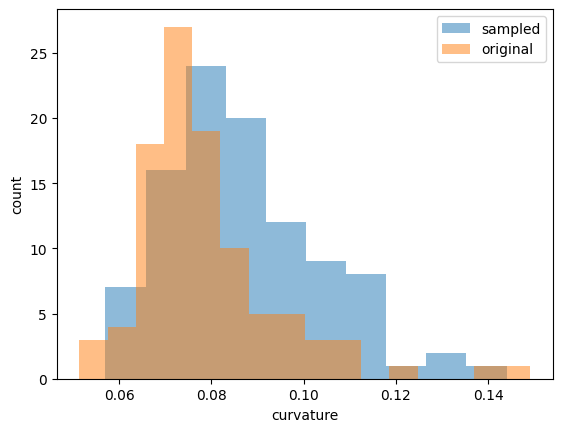

NameError: name 'y1' is not defined

In [1]:
import json
import numpy as np

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-squad-100--m150--tok_true"
lens = 'raw_data_lens.json'
#likelihoods = 'likelihood_threshold_results.json'
likelihoods = 'perturbation_5_d_results.json'

f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)


### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    y1_squad = lls_dict['predictions']['real'][acc:acc + len_s]
    y2_squad = lls_dict['predictions']['samples'][acc:acc + len_s]
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanstd(y2_squad[::]))
    org_stds.append(np.nanstd(y1_squad[::]))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))

import matplotlib.pyplot as plt
import numpy as np
y1_squad = org_stds #np.array([item['original_crit'] for item in ex_0])
y2_squad = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2_squad, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1_squad, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import math

real_preds =  [element for element in org_stds if not math.isnan(element)]
sample_preds = [element for element in samples_stds if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_accurate = '/home/niloofar/projects/detect-gpt-copying/results/mistral/EleutherAI_pythia-2.8b-main-t5-3b-temp/fp32-0.3-1-squad-312/perturbation_25_d_results.json'
roc_file = open(roc_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

roc_less_accurate = '/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-squad-100--m150--tok_false/perturbation_5_d_results.json'
roc_file = open(roc_less_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

0.7512
0.9187666666666666
0.7819999999999999


# 3 sets

100 100 100 100


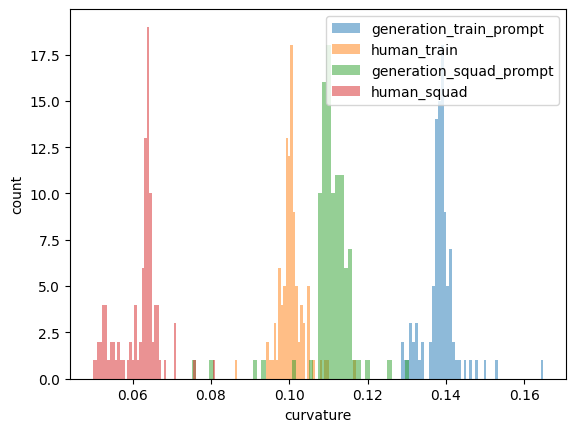

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(y2, alpha=0.5, bins=50, label='generation_train_prompt')
plt.hist(y1, alpha=0.5, bins=50, label='human_train')

plt.hist(y2_squad, alpha=0.5, bins=50, label='generation_squad_prompt')
plt.hist(y1_squad, alpha=0.5, bins=50, label='human_squad')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')
print(len(y1),len(y2),len(y1_squad),len(y2_squad))

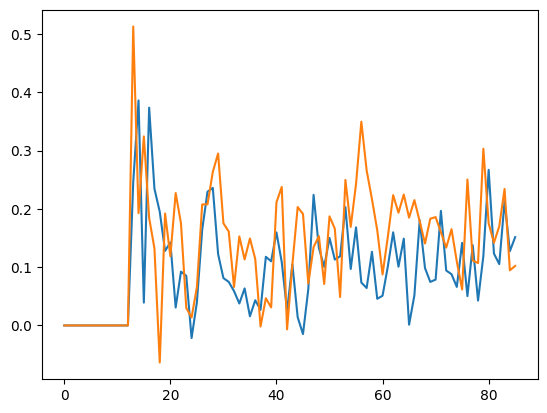

0.0830283793899355
0.10049143544268273


In [65]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array(lls_dict['predictions']['real'][:lens_list[sample_no]])
y2 = np.array(lls_dict['predictions']['samples'][:lens_list[sample_no]])

plt.plot(y1)
plt.plot(y2)

plt.show()
print(np.std(y1))
print(np.std(y2))

0.7554500000000001
0.8039055555555557
0.6752


# shorter len

In [ ]:
import json
import numpy as np

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--ref_facebook_opt-2.7B--m50--tok_true/"
lens = 'raw_data_lens.json'
#likelihoods = 'likelihood_threshold_results.json'
likelihoods = 'perturbation_5_d_results.json'

f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)


### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    y1 = lls_dict['predictions']['real'][:acc + len_s]
    y2 = lls_dict['predictions']['samples'][:acc + len_s]
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanmean(y2[::]))
    org_stds.append(np.nanmean(y1[::]))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))

import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

# 40

100
100


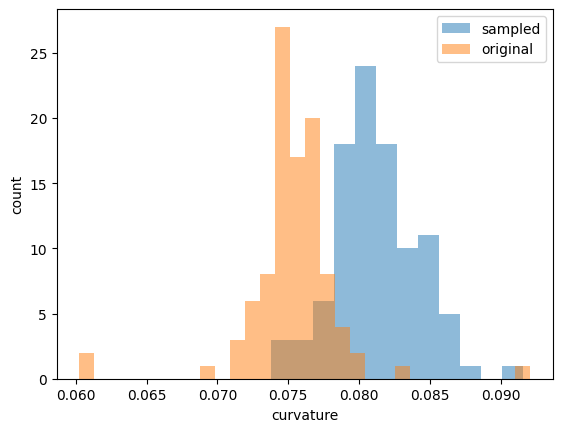

0.003336770182892397
0.0030057127615091676


In [1]:
import json
import numpy as np

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m40--tok_true/"
lens = 'raw_data_lens.json'
#likelihoods = 'likelihood_threshold_results.json'
likelihoods = 'perturbation_5_d_results.json'

f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)


### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    y1 = lls_dict['predictions']['real'][:acc + len_s]
    y2 = lls_dict['predictions']['samples'][:acc + len_s]
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanmean(y2[::]))
    org_stds.append(np.nanmean(y1[::]))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))

import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

In [4]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import math

real_preds =  [element for element in org_stds if not math.isnan(element)]
sample_preds = [element for element in samples_stds if not math.isnan(element)]

fpr, tpr, _ = roc_curve([0] * len(real_preds) + [1] * len(sample_preds), real_preds + sample_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_accurate = '/home/niloofar/projects/extraction_sampling/results/all2/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m40--tok_false/perturbation_25_d_results.json'
roc_file = open(roc_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

roc_less_accurate = '/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-2.8B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m40--tok_false/perturbation_5_d_results.json'
roc_file = open(roc_less_accurate,'r')

roc = json.load(roc_file)['metrics']['roc_auc']
print(roc)

0.9359000000000001
0.55395
0.5345


# Bigger model

In [5]:
import json
import numpy as np

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_pythia-6.9B-main-t5-3b-temp/fp32-0.3-1-the_pile-100--m150--tok_true/"
lens = 'raw_data_lens.json'
#likelihoods = 'likelihood_threshold_results.json'
likelihoods = 'perturbation_5_d_results.json'

f_lens = open(f'{directory}/{lens}')
lens_list = json.load(f_lens)

f_lls = open(f'{directory}/{likelihoods}')
lls_dict = json.load(f_lls)


### get stds

#ex_0 = lls_dict['raw_results'][:lens_list[sample_no]]

samples_stds = []
org_stds = []
acc = 0

for i, len_s in enumerate(lens_list):
    y1 = lls_dict['predictions']['real'][:acc + len_s]
    y2 = lls_dict['predictions']['samples'][:acc + len_s]
    #y1 = np.array([item['original_crit'] for item in ex])
    #y2 = np.array([item['sampled_crit'] for item in ex])

    samples_stds.append(np.nanmean(y2[::]))
    org_stds.append(np.nanmean(y1[::]))
    acc += len_s

print(len(samples_stds))
print(len(org_stds))

import matplotlib.pyplot as plt
import numpy as np
y1 = org_stds #np.array([item['original_crit'] for item in ex_0])
y2 = samples_stds #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

# neighbors

In [88]:
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_gpt-neo-2.7B-main-t5-3b-temp/fp32-0.3-1-the_pile-5000--ref_facebook_opt-2.7B--tok_false"
#lens = 'raw_data_lens.json'
curvs = 'perturbation_50_z_results.json'

In [89]:
f_curvs = open(f'{directory}/{curvs}')
curvs_dict = json.load(f_curvs)



In [90]:
print((curvs_dict.keys()))


dict_keys(['name', 'predictions', 'info', 'raw_results', 'metrics', 'pr_metrics', 'loss'])


In [91]:
print(len(curvs_dict['predictions']['real']))
print(len(curvs_dict['predictions']['samples']))


4400
4400


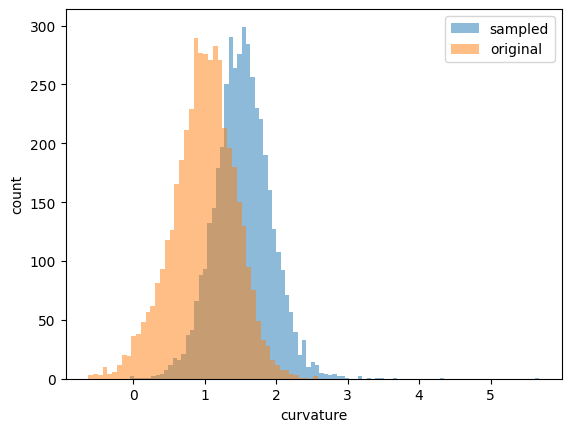

0.4425793254760547
0.3999155729369099


In [93]:
import matplotlib.pyplot as plt
import numpy as np

y1 = curvs_dict['predictions']['real'] #np.array([item['original_crit'] for item in ex_0])
y2 = curvs_dict['predictions']['samples'] #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))

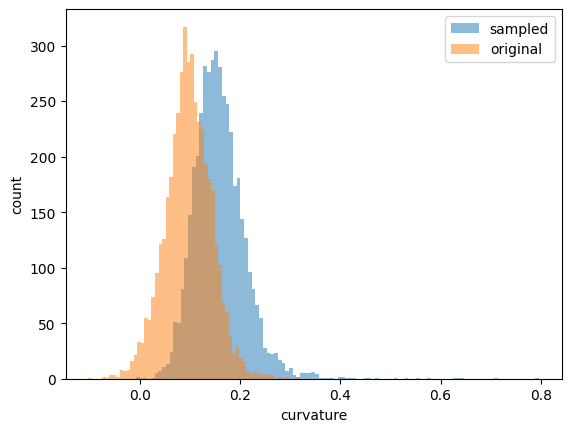

0.04660853580021261
0.05422293810752668


In [94]:
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_gpt-neo-2.7B-main-t5-3b-temp/fp32-0.3-1-the_pile-5000--ref_facebook_opt-2.7B--tok_false"
#lens = 'raw_data_lens.json'
curvs = 'perturbation_50_d_results.json'

f_curvs = open(f'{directory}/{curvs}')
curvs_dict = json.load(f_curvs)


import matplotlib.pyplot as plt
import numpy as np
y1 = curvs_dict['predictions']['real'] #np.array([item['original_crit'] for item in ex_0])
y2 = curvs_dict['predictions']['samples'] #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))


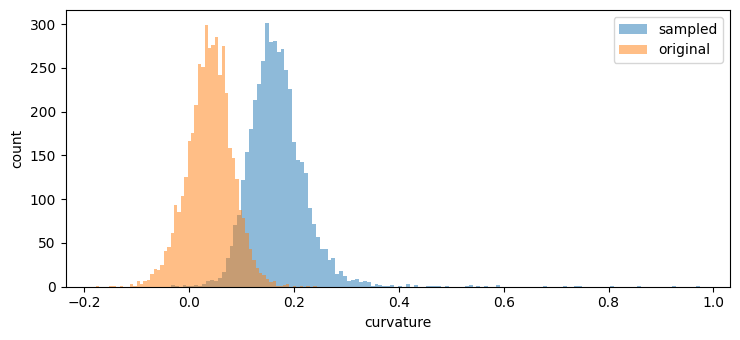

0.04269772862296667
0.06027849009029081


In [125]:
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_gpt-neo-125m-main-t5-3b-temp/fp32-0.3-1-the_pile-5000--ref_facebook_opt-125m--tok_false"
#lens = 'raw_data_lens.json'
curvs = 'perturbation_50_d_results.json'

f_curvs = open(f'{directory}/{curvs}')
curvs_dict = json.load(f_curvs)


import matplotlib.pyplot as plt
import numpy as np

y1 = curvs_dict['predictions']['real'] #np.array([item['original_crit'] for item in ex_0])
y2 = curvs_dict['predictions']['samples'] #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1))
print(np.std(y2))


# main scatter

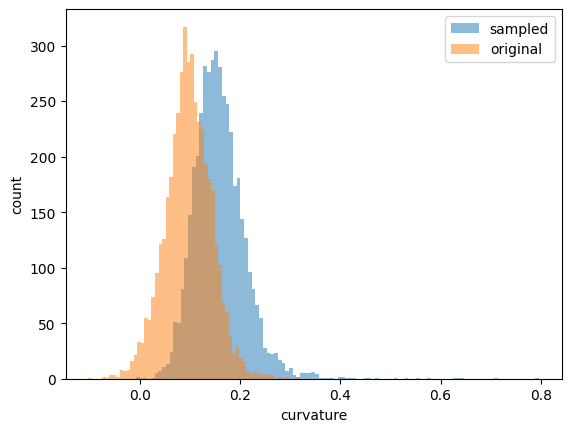

0.04660853580021261
0.05422293810752668


In [5]:
import json 

directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_gpt-neo-2.7B-main-t5-3b-temp/fp32-0.3-1-the_pile-5000--ref_facebook_opt-2.7B--tok_false"
#lens = 'raw_data_lens.json'
curvs = 'perturbation_50_d_results.json'

f_curvs = open(f'{directory}/{curvs}')
curvs_dict = json.load(f_curvs)


import matplotlib.pyplot as plt
import numpy as np

y1_d = curvs_dict['predictions']['real'] #np.array([item['original_crit'] for item in ex_0])
y2_d = curvs_dict['predictions']['samples'] #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2_d, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1_d, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1_d))
print(np.std(y2_d))


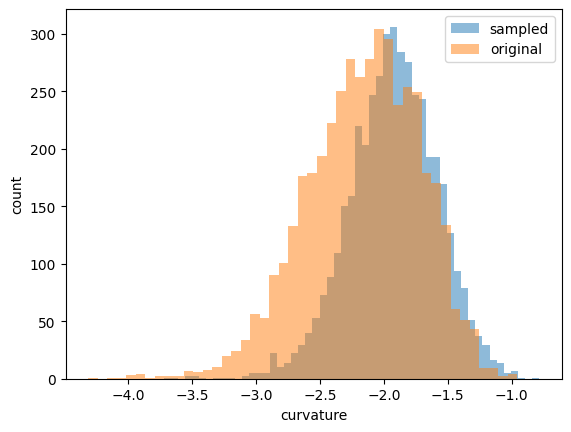

0.4432530456607513
0.3456151125414395


In [7]:
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_gpt-neo-2.7B-main-t5-3b-temp/fp32-0.3-1-the_pile-5000--ref_facebook_opt-2.7B--tok_false"
#lens = 'raw_data_lens.json'
curvs = 'likelihood_threshold_results.json'

f_curvs = open(f'{directory}/{curvs}')
curvs_dict = json.load(f_curvs)


import matplotlib.pyplot as plt
import numpy as np

y1_ll = curvs_dict['predictions']['real'] #np.array([item['original_crit'] for item in ex_0])
y2_ll = curvs_dict['predictions']['samples'] #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2_ll, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1_ll, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1_ll))
print(np.std(y2_ll))


# scatter

/tmp/ipykernel_298165/3761443480.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y2_d, y2_ll, alpha=0.25, c='blue', cmap='hot',label = 'sampled')
/tmp/ipykernel_298165/3761443480.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y1_d, y1_ll, alpha=0.25, c='orange', cmap='hot', label='original')


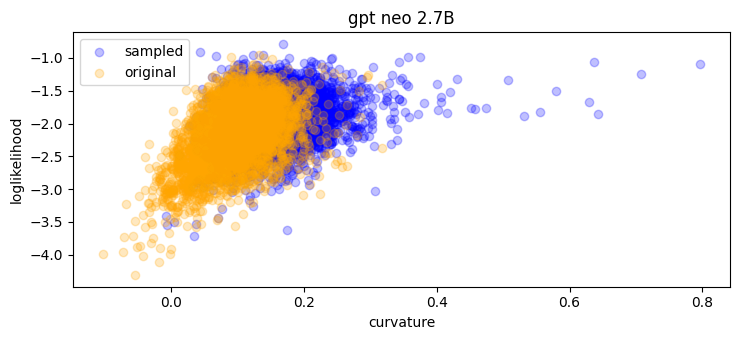

In [8]:
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension
data = np.array(np.random.random((100, 3)))

# Scatter plot
plt.scatter(y2_d, y2_ll, alpha=0.25, c='blue', cmap='hot',label = 'sampled')

plt.scatter(y1_d, y1_ll, alpha=0.25, c='orange', cmap='hot', label='original')


plt.legend()
# Display the plot

plt.xlabel("curvature")
plt.ylabel('loglikelihood')
plt.title('gpt neo 2.7B')

plt.show()


/tmp/ipykernel_298165/3334055940.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(np.array(y2_d)-np.array(y1_d), np.array(y2_ll)-np.array(y1_ll), alpha=0.25, c='blue', cmap='hot',label = 'sampled')


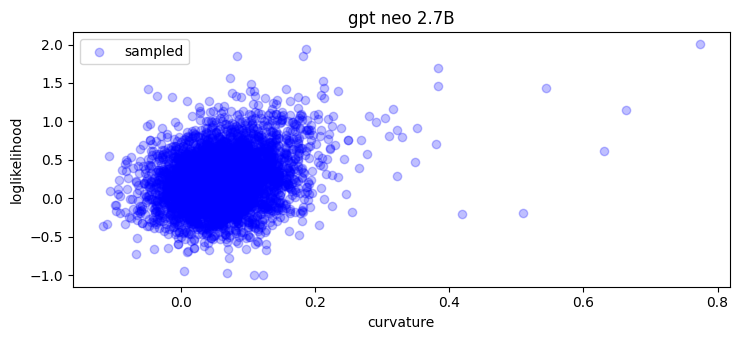

In [11]:
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension
data = np.array(np.random.random((100, 3)))

# Scatter plot
plt.scatter(np.array(y2_d)-np.array(y1_d), np.array(y2_ll)-np.array(y1_ll), alpha=0.25, c='blue', cmap='hot',label = 'sampled')

#plt.scatter(y1_d, y1_ll, alpha=0.25, c='orange', cmap='hot', label='original')


plt.legend()
# Display the plot

plt.xlabel("curvature")
plt.ylabel('loglikelihood')
plt.title('gpt neo 2.7B')

plt.show()


In [14]:
print(np.mean(y1_d),np.mean(y2_d),np.mean(y1_ll),np.mean(y2_ll))

0.09692947045104071 0.15906995044025507 -2.1598901251906697 -1.9271143666722559


# 125 m scatter

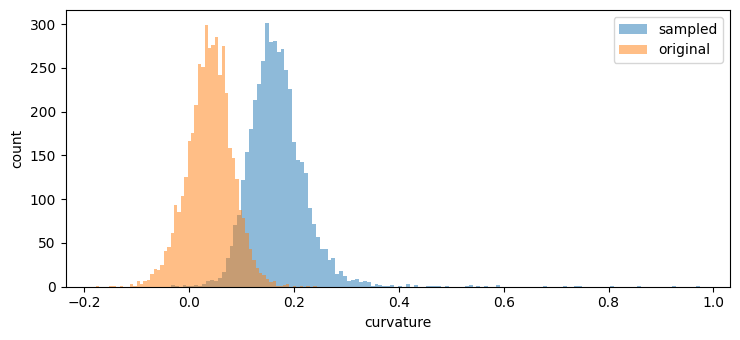

0.04269772862296667
0.06027849009029081


In [23]:
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_gpt-neo-125m-main-t5-3b-temp/fp32-0.3-1-the_pile-5000--ref_facebook_opt-125m--tok_false"
#lens = 'raw_data_lens.json'
curvs = 'perturbation_50_d_results.json'

f_curvs = open(f'{directory}/{curvs}')
curvs_dict = json.load(f_curvs)


import matplotlib.pyplot as plt
import numpy as np

y1_d = curvs_dict['predictions']['real'] #np.array([item['original_crit'] for item in ex_0])
y2_d = curvs_dict['predictions']['samples'] #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2_d, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1_d, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1_d))
print(np.std(y2_d))

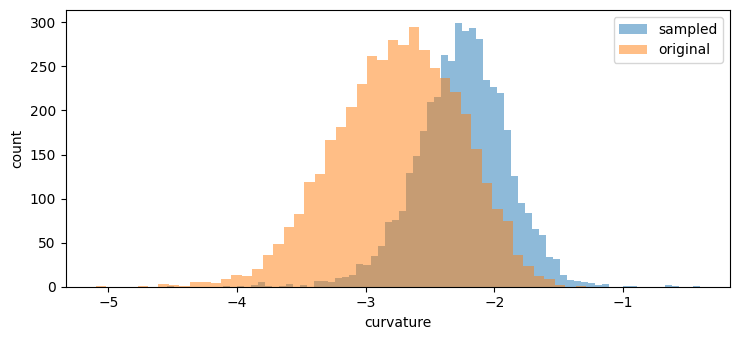

0.4847370137382827
0.3572510924814171


In [24]:
directory = "/home/niloofar/projects/extraction_sampling/results/all/EleutherAI_gpt-neo-125m-main-t5-3b-temp/fp32-0.3-1-the_pile-5000--ref_facebook_opt-125m--tok_false"
#lens = 'raw_data_lens.json'
curvs = 'likelihood_threshold_results.json'

f_curvs = open(f'{directory}/{curvs}')
curvs_dict = json.load(f_curvs)


import matplotlib.pyplot as plt
import numpy as np


y1_ll = curvs_dict['predictions']['real'] #np.array([item['original_crit'] for item in ex_0])
y2_ll = curvs_dict['predictions']['samples'] #np.array([item['sampled_crit'] for item in ex_0])

plt.hist(y2_ll, alpha=0.5, bins='auto', label='sampled')
plt.hist(y1_ll, alpha=0.5, bins='auto', label='original')
plt.xlabel("curvature")
plt.ylabel('count')
plt.legend(loc='upper right')


plt.show()
print(np.std(y1_ll))
print(np.std(y2_ll))

/tmp/ipykernel_298165/1055636086.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y2_d, y2_ll, alpha=0.25, c='blue', cmap='hot',label = 'sampled')
/tmp/ipykernel_298165/1055636086.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y1_d, y1_ll, alpha=0.25, c='orange', cmap='hot', label='original')


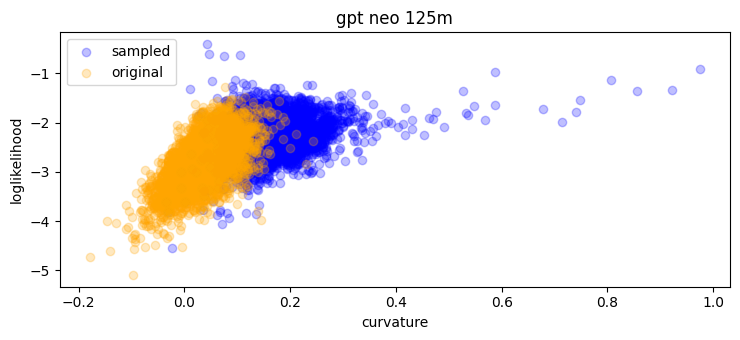

In [25]:
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension
data = np.array(np.random.random((100, 3)))

# Scatter plot
plt.scatter(y2_d, y2_ll, alpha=0.25, c='blue', cmap='hot',label = 'sampled')

plt.scatter(y1_d, y1_ll, alpha=0.25, c='orange', cmap='hot', label='original')


plt.legend()
# Display the plot

plt.xlabel("curvature")
plt.ylabel('loglikelihood')
plt.title('gpt neo 125m')

plt.show()


In [26]:
print(np.mean(y1_d),np.mean(y2_d),np.mean(y1_ll),np.mean(y2_ll))

0.03913145339218053 0.16917712277458474 -2.750218295590444 -2.255400946898894
